In [22]:
import os
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import geopy


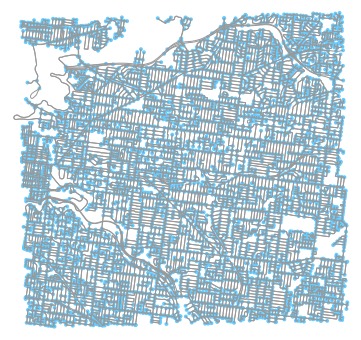

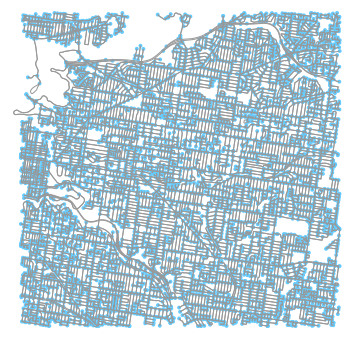

In [82]:
#downloading map from on street maps

# help
# https://github.com/gboeing/osmnx-examples/tree/master/notebooks
# https://osmnx.readthedocs.io/en/stable/osmnx.html
    
G = ox.graph_from_bbox(-37.7767, -37.8683, 145.1218, 145.0037, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)
fig, ax = ox.plot_graph(G)

In [52]:

ox.save_load.save_graphml(G, filename='graph.graphml')
# G is of type MultiDiGraph
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [53]:
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])

1.0344927894770812


In [54]:
extended_stats = ox.extended_stats(G)
print(extended_stats['pagerank_max_node'])

340363892


In [55]:
# https://networkx.github.io/documentation/networkx-1.9.1/reference/classes.multigraph.html


In [56]:
basic_stats

{'n': 7872,
 'm': 19598,
 'k_avg': 4.979166666666667,
 'intersection_count': 6933,
 'streets_per_node_avg': 2.8502286585365852,
 'streets_per_node_counts': {0: 0,
  1: 939,
  2: 47,
  3: 6165,
  4: 698,
  5: 21,
  6: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.11928353658536585,
  2: 0.005970528455284553,
  3: 0.7831554878048781,
  4: 0.08866869918699187,
  5: 0.0026676829268292685,
  6: 0.00025406504065040653},
 'edge_length_total': 2309951.8980000205,
 'edge_length_avg': 117.86671588937752,
 'street_length_total': 1237186.8490000053,
 'street_length_avg': 111.60909778980653,
 'street_segments_count': 11085,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0344927894770812,
 'self_loop_proportion': 0.0015817940606184305,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [83]:
G.number_of_edges()

19598

In [87]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
edges.columns

Index(['u', 'v', 'key', 'osmid', 'lanes', 'name', 'highway', 'oneway',
       'length', 'geometry', 'maxspeed', 'ref', 'junction', 'bridge', 'access',
       'width'],
      dtype='object')

In [88]:
edges.head()

,u,v,key,osmid,lanes,name,highway,oneway,length,geometry,maxspeed,ref,junction,bridge,access,width
0,264257540,264257462,0,24359224,2,St Johns Avenue,residential,False,300.388,"LINESTRING (145.1078582 -37.8215635, 145.10737...",NaN,NaN,NaN,NaN,NaN,NaN
1,264257540,259935413,0,139339312,NaN,Mont Albert Road,tertiary,False,44.063,"LINESTRING (145.1078582 -37.8215635, 145.10835...",NaN,NaN,NaN,NaN,NaN,NaN
2,264257540,264256403,0,139339312,NaN,Mont Albert Road,tertiary,False,53.031,"LINESTRING (145.1078582 -37.8215635, 145.10726...",NaN,NaN,NaN,NaN,NaN,NaN
3,311443461,311441686,0,30639272,NaN,Tooronga Road,secondary,False,13.753,"LINESTRING (145.0471867 -37.8331391, 145.04716...",60,NaN,NaN,NaN,NaN,NaN
4,311443461,311443542,0,30639272,NaN,Tooronga Road,secondary,False,99.083,"LINESTRING (145.0471867 -37.8331391, 145.04733...",60,NaN,NaN,NaN,NaN,NaN


In [90]:
# Nodes = points
G.number_of_nodes()

7872

In [91]:
nodes = ox.graph_to_gdfs(G, nodes=True, edges=False)
nodes.columns

Index(['y', 'x', 'osmid', 'highway', 'ref', 'geometry'], dtype='object')

In [92]:
nodes.head()

,y,x,osmid,highway,ref,geometry
264257540,-37.821564,145.107858,264257540,NaN,NaN,POINT (145.1078582 -37.8215635)
311443461,-37.833139,145.047187,311443461,NaN,NaN,POINT (145.0471867 -37.8331391)
30949382,-37.830646,145.121469,30949382,NaN,NaN,POINT (145.1214694 -37.8306463)
311410695,-37.820258,145.049292,311410695,NaN,NaN,POINT (145.0492919 -37.8202577)
127369229,-37.795056,145.035786,127369229,NaN,NaN,POINT (145.0357857 -37.7950563)


In [74]:
G.add_node('970', pos=(-37.86703, 145.09159))
G.add_node('2000', pos=(-37.8516827, 145.0943457))
G.add_edge('970', '2000')

0

NetworkXError: Node 264257540 has no position.

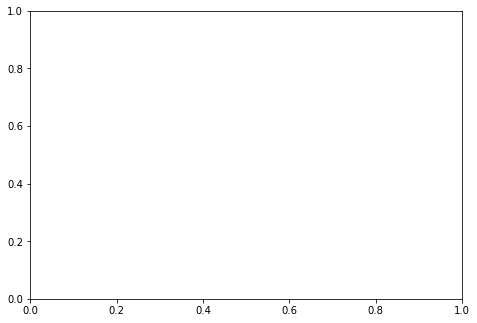

In [43]:
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=0)

In [68]:
G.clear()

In [78]:
from fiona.crs import from_epsg
G.crs = from_epsg(4326)

G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

KeyError: 'crs'

In [60]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

In [79]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

TypeError: float() argument must be a string or a number, not 'NoneType'